In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 5.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
start_date = "2023-01-01"
end_date = "2023-02-11"
df = yf.download(['GOOG', 'MSFT'], start=start_date, end=end_date)
df.head()

[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                   High  \
                 GOOG        MSFT       GOOG        MSFT       GOOG   
Date                                                                  
2023-01-03  89.699997  239.580002  89.699997  239.580002  91.550003   
2023-01-04  88.709999  229.100006  88.709999  229.100006  91.239998   
2023-01-05  86.769997  222.309998  86.769997  222.309998  88.209999   
2023-01-06  88.160004  224.929993  88.160004  224.929993  88.470001   
2023-01-09  88.800003  227.119995  88.800003  227.119995  90.830002   

                              Low                   Open              \
                  MSFT       GOOG        MSFT       GOOG        MSFT   
Date                                                                   
2023-01-03  245.750000  89.019997  237.399994  89.830002  243.080002   
2023-01-04  232.869995  87.800003  225.960007  91.010002  232.279999   
2023-01-05  227.550003  86.559998  221.759995  88.070000  227.199997   
2023-01-06  225.759995  85.570000  219.350006  87.360001  223.000000   
2023-01-09  231.240005  88.580002  226.410004  89.195000  226.449997   

              Volume            
                GOOG      MSFT  
Date                            
2023-01-03  20738500  25740000  
2023-01-04  27046500  50623400  
2023-01-05  23136100  39585600  
2023-01-06  26604400  43597700  
2023-01-09  22996700  27369800

In [ ]:
# use the adjusted closing price
df2 = df['Adj Close']
df2.head()

,GOOG,MSFT
Date,,
2023-01-03,89.699997,239.580002
2023-01-04,88.709999,229.100006
2023-01-05,86.769997,222.309998
2023-01-06,88.160004,224.929993
2023-01-09,88.800003,227.119995


In [ ]:
# check index format
df2.index

DatetimeIndex(['2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-17', '2023-01-18', '2023-01-19',
               '2023-01-20', '2023-01-23', '2023-01-24', '2023-01-25',
               '2023-01-26', '2023-01-27', '2023-01-30', '2023-01-31',
               '2023-02-01', '2023-02-02', '2023-02-03', '2023-02-06',
               '2023-02-07', '2023-02-08', '2023-02-09', '2023-02-10'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
# slice by index with a period by month
df2.loc["2023-02"]

,GOOG,MSFT
Date,,
2023-02-01,101.430000,252.750000
2023-02-02,108.800003,264.600006
2023-02-03,105.220001,258.350006
2023-02-06,103.470001,256.769989
2023-02-07,108.040001,267.559998
2023-02-08,100.000000,266.730011
2023-02-09,95.459999,263.619995
2023-02-10,94.860001,263.100006


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 2023-01-03 to 2023-02-10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOG    28 non-null     float64
 1   MSFT    28 non-null     float64
dtypes: float64(2)
memory usage: 672.0 bytes


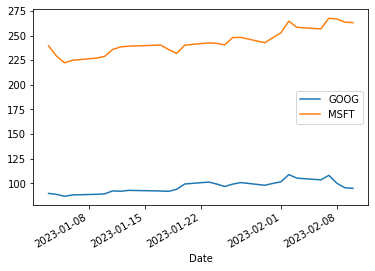

In [ ]:
df2.plot.line()

In [ ]:
returns_df = df2.pct_change()
returns_df.head()

,GOOG,MSFT
Date,,
2023-01-03,NaN,NaN
2023-01-04,-0.011037,-0.043743
2023-01-05,-0.021869,-0.029638
2023-01-06,0.016019,0.011785
2023-01-09,0.007260,0.009736


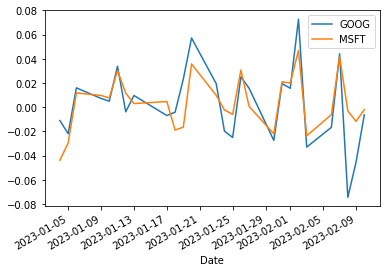

In [ ]:
returns_df.plot.line()

In [ ]:
initial_wealth = 1000
wealth_index_df = initial_wealth*(1+returns_df).cumprod()
wealth_index_df.head()

,GOOG,MSFT
Date,,
2023-01-03,NaN,NaN
2023-01-04,988.963234,956.256801
2023-01-05,967.335558,927.915502
2023-01-06,982.831735,938.851285
2023-01-09,989.966623,947.992292


In [ ]:
wealth_index_df.loc["2023-01-03"] = initial_wealth
wealth_index_df.head()

,GOOG,MSFT
Date,,
2023-01-03,1000.000000,1000.000000
2023-01-04,988.963234,956.256801
2023-01-05,967.335558,927.915502
2023-01-06,982.831735,938.851285
2023-01-09,989.966623,947.992292


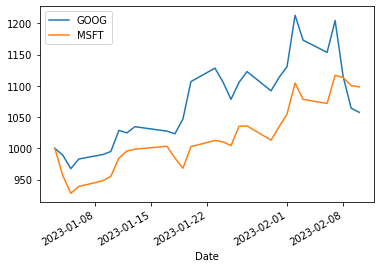

In [ ]:
wealth_index_df.plot.line()

In [ ]:
prior_peaks_df = wealth_index_df.cummax()
prior_peaks_df.head()

,GOOG,MSFT
Date,,
2023-01-03,1000.0,1000.0
2023-01-04,1000.0,1000.0
2023-01-05,1000.0,1000.0
2023-01-06,1000.0,1000.0
2023-01-09,1000.0,1000.0


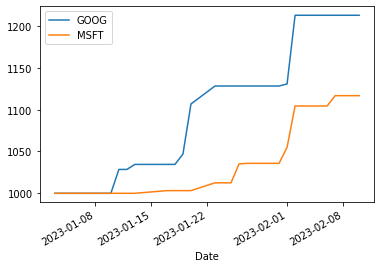

In [ ]:
prior_peaks_df.plot.line()

In [ ]:
drawdown_df = (wealth_index_df - prior_peaks_df) / prior_peaks_df
drawdown_df.head()

,GOOG,MSFT
Date,,
2023-01-03,0.000000,0.000000
2023-01-04,-0.011037,-0.043743
2023-01-05,-0.032664,-0.072084
2023-01-06,-0.017168,-0.061149
2023-01-09,-0.010033,-0.052008


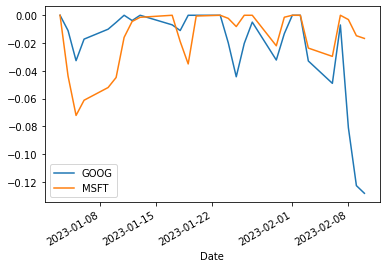

In [ ]:
drawdown_df.plot.line()

In [ ]:
drawdown_df.min()

GOOG   -0.128125
MSFT   -0.072084
dtype: float64

In [ ]:
drawdown_df.idxmin()

GOOG   2023-02-10
MSFT   2023-01-05
dtype: datetime64[ns]

In [ ]:
drawdown_df.loc["2023-01"].min()

GOOG   -0.044264
MSFT   -0.072084
dtype: float64

In [ ]:
drawdown_df.loc["2023-01"].idxmin()

GOOG   2023-01-25
MSFT   2023-01-05
dtype: datetime64[ns]

In [ ]:
def drawdown(return_series: pd.Series):
    """
    Input: a time series of asset returns
    Output: a DataFrame that contains:
    - the wealth index
    - the prior peaks
    - percentage drawdowns
    """
    wealth_index_series = initial_wealth*(1+return_series).cumprod()
    prior_peaks_series = wealth_index_series.cummax()
    drawdown_series = (wealth_index_series - prior_peaks_series) / prior_peaks_series
    return pd.DataFrame({
        "Wealth index": wealth_index_series,
        "Prior peaks": prior_peaks_series,
        "Drawdown": drawdown_series
    })

In [ ]:
drawdown(returns_df["GOOG"]).head()

,Wealth index,Prior peaks,Drawdown
Date,,,
2023-01-03,NaN,NaN,NaN
2023-01-04,988.963234,988.963234,0.000000
2023-01-05,967.335558,988.963234,-0.021869
2023-01-06,982.831735,988.963234,-0.006200
2023-01-09,989.966623,989.966623,0.000000


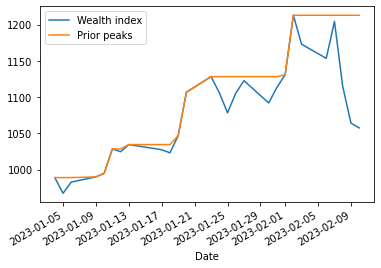

In [ ]:
drawdown(returns_df["GOOG"])[['Wealth index', 'Prior peaks']].plot.line()

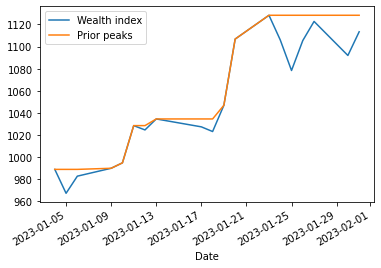

In [ ]:
drawdown(returns_df.loc["2023-01","GOOG"])[['Wealth index', 'Prior peaks']].plot.line()

In [ ]:
drawdown(returns_df["GOOG"])['Drawdown'].min()

-0.1281250188455857

In [ ]:
drawdown(returns_df["GOOG"])['Drawdown'].idxmin()

Timestamp('2023-02-10 00:00:00')

In [ ]:
drawdown(returns_df["MSFT"])['Drawdown'].min()

-0.035032299621028426

In [ ]:
drawdown(returns_df["MSFT"])['Drawdown'].idxmin()

Timestamp('2023-01-19 00:00:00')

In [ ]:
drawdown(returns_df.loc["2023-01","GOOG"])['Drawdown'].min()

-0.04426435893749917

In [ ]:
drawdown(returns_df.loc["2023-01","MSFT"])['Drawdown'].min()

-0.035032299621028426

# Backtesting the trend following strategy

In [ ]:
df_goog = yf.download(['GOOG'], start="2022-01-01", end="2023-01-01")['Adj Close']
df_goog = pd.DataFrame(df_goog)
df_goog.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2022-01-03,145.074493
2022-01-04,144.416504
2022-01-05,137.653503
2022-01-06,137.550995
2022-01-07,137.004501


In [ ]:
sma_span = 30
ema_span = 5
short_ma = 'ema'+str(ema_span)
long_ma ='sma'+str(sma_span)
df_goog[long_ma] = df_goog['Adj Close'].rolling(sma_span).mean()
df_goog[short_ma] = df_goog['Adj Close'].ewm(span=ema_span).mean()
df_goog.head()

,Adj Close,sma30,ema5
Date,,,
2022-01-03,145.074493,NaN,145.074493
2022-01-04,144.416504,NaN,144.679700
2022-01-05,137.653503,NaN,141.351501
2022-01-06,137.550995,NaN,139.772829
2022-01-07,137.004501,NaN,138.710106


In [ ]:
df_goog.dropna(inplace=True)
df_goog.head()

,Adj Close,sma30,ema5
Date,,,
2022-02-14,135.300003,137.335750,137.064586
2022-02-15,136.425507,137.047450,136.851559
2022-02-16,137.487503,136.816483,137.063541
2022-02-17,132.308502,136.638317,135.478525
2022-02-18,130.467499,136.402200,133.808181


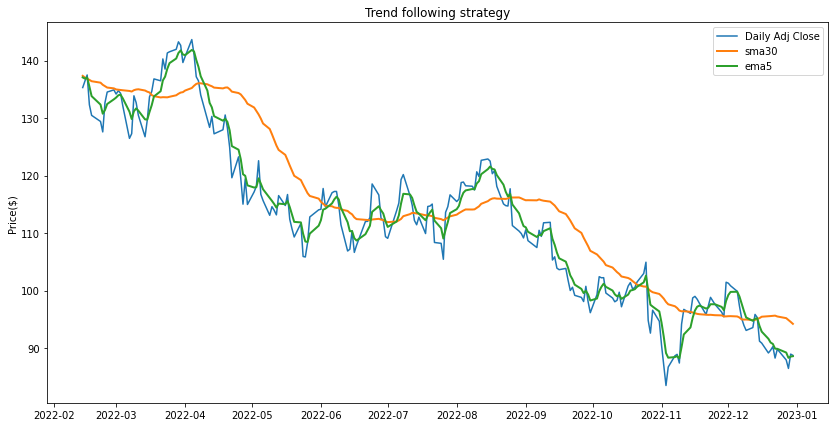

In [ ]:
fig = plt.figure(figsize=(14,7))
plt.plot(df_goog.index, df_goog['Adj Close'], linewidth=1.5, label='Daily Adj Close')
plt.plot(df_goog.index, df_goog[long_ma], linewidth=2, label=long_ma)
plt.plot(df_goog.index, df_goog[short_ma], linewidth=2, label=short_ma)
plt.title("Trend following strategy")
plt.ylabel('Price($)')
plt.legend()

In [ ]:
# log returns of the Buy and Hold strategy
df_goog['log_return_buy_n_hold'] = np.log(df_goog['Adj Close'] / df_goog['Adj Close'].shift(1))

# equivalent approach
# df_goog['log_return_buy_n_hold'] = np.log(df_goog['Adj Close']).diff()

In [ ]:
# identify buy signal
df_goog['signal'] = np.where(df_goog[short_ma] > df_goog[long_ma], 1, 0)
# identify sell signal
df_goog['signal'] = np.where(df_goog[short_ma] < df_goog[long_ma], -1, df_goog['signal'])
df_goog.dropna(inplace=True)
df_goog.head()

,Adj Close,sma30,ema5,log_return_buy_n_hold,signal
Date,,,,,
2022-02-15,136.425507,137.047450,136.851559,0.008284,-1
2022-02-16,137.487503,136.816483,137.063541,0.007754,1
2022-02-17,132.308502,136.638317,135.478525,-0.038397,-1
2022-02-18,130.467499,136.402200,133.808181,-0.014012,-1
2022-02-22,129.402496,136.148800,132.339619,-0.008196,-1


In [ ]:
# calculate instantaneous log return for trend following straetegy
df_goog['log_return_trend_follow'] = df_goog['signal'] * df_goog['log_return_buy_n_hold']
df_goog.head()

,Adj Close,sma30,ema5,log_return_buy_n_hold,signal,log_return_trend_follow
Date,,,,,,
2022-02-15,136.425507,137.047450,136.851559,0.008284,-1,-0.008284
2022-02-16,137.487503,136.816483,137.063541,0.007754,1,0.007754
2022-02-17,132.308502,136.638317,135.478525,-0.038397,-1,0.038397
2022-02-18,130.467499,136.402200,133.808181,-0.014012,-1,0.014012
2022-02-22,129.402496,136.148800,132.339619,-0.008196,-1,0.008196


## terminal return

In [ ]:
# terminal return of buy-n-hold
np.exp(df_goog['log_return_buy_n_hold']).cumprod()[-1] -1

-0.34419806832531474

In [ ]:
# another way to calculate
np.exp(df_goog['log_return_buy_n_hold']).prod() - 1

-0.34419806832531474

In [ ]:
# terminal return of trend following
np.exp(df_goog['log_return_trend_follow']).cumprod()[-1] -1

0.3609149965748346

In [ ]:
# another way to calculate
np.exp(df_goog['log_return_trend_follow']).prod() - 1

0.3609149965748346

## annualized return

In [ ]:
# calculate annualized return of buy-n-hold
annualized_return_buy_n_hold = np.exp(df_goog['log_return_buy_n_hold']).prod()**(252/df_goog.shape[0])-1
annualized_return_buy_n_hold

-0.3818823804560594

In [ ]:
# calculate annualized return of trend following
annualized_return_trend_follow = np.exp(df_goog['log_return_trend_follow']).prod()**(252/df_goog.shape[0])-1
annualized_return_trend_follow

0.4210313983829783

In [ ]:
# alternative approach
np.exp(df_goog['log_return_trend_follow'].sum())**(252/df_goog.shape[0])-1

0.4210313983829783

## annualized volatility

In [ ]:
# calculate annualized volatility of buy-n-hold
annualized_vol_buy_n_hold = (np.exp(df_goog['log_return_buy_n_hold'])-1).std()*(252**0.5)
annualized_vol_buy_n_hold

0.3896836224899977

In [ ]:
# calculate annualized volatility of trend following
annualized_vol_trend_follow = (np.exp(df_goog['log_return_trend_follow'])-1).std()*(252**0.5)
annualized_vol_trend_follow

0.39285546408734645

## Sharpe ratio

In [ ]:
riskfree_rate = 0.03

In [ ]:
# calculate Sharpe ratio of buy-n-hold
sharpe_ratio_buy_n_hold = (annualized_return_buy_n_hold - riskfree_rate) / annualized_vol_buy_n_hold
sharpe_ratio_buy_n_hold

-1.0569661045137495

In [ ]:
# calculate Sharpe ratio of trend following
sharpe_ratio_trend_follow = (annualized_return_trend_follow - riskfree_rate) / annualized_vol_trend_follow
sharpe_ratio_trend_follow

0.9953569038205886

## max drawdown

In [ ]:
# max drawdown of buy-n-hold
max_drawdown_buy_n_hold = drawdown(np.exp(df_goog['log_return_buy_n_hold'])-1)['Drawdown'].min()
max_drawdown_buy_n_hold

-0.41876535983781205

In [ ]:
# max drawdown of trend following
max_drawdown_trend_follow = drawdown(np.exp(df_goog['log_return_trend_follow'])-1)['Drawdown'].min()
max_drawdown_trend_follow

-0.20685357874978227